In [57]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles
from statsmodels import robust
import seaborn as sns

In [45]:
df = pd.read_csv('../data/state.csv')
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [46]:
df.shape

(50, 4)

# 1. 위치 추정
- 데이터의 값들이 어디쯤에 위치하는지(중심경향성)를 나타내는 추정값을 확인하는 과정
- 평균, 가중평균, 중앙값, 백분위수, 가중 중앙값, 절사평균, 극단값 등을 확인

## Exercise 1. 인구에 따른 살인 비율의 대표값 추정
    - 인구의 평균, 절사평균, 중앙값 계산

In [47]:
# 평균
df['Population'].mean()

6162876.3

In [48]:
# 절사평균
trim_mean(df['Population'], 0.1) # 0.1은 각 끝에서 10%를 제외한다는 것을 뜻함
# 즉, 50개의 행 중에서 상위 5%, 하위 5%인 각각 5개씩 총 10개를 제외하고 평균을 구함

4783697.125

In [49]:
# 중앙값
df['Population'].median()

4436369.5

In [50]:
# 살인 비율의 가중평균
np.average(df['Murder.Rate'], weights=df['Population'])

4.445833981123393

In [51]:
# 가중 중간값
wquantiles.median(df['Murder.Rate'], weights=df['Population'])

4.4

# 2. 변이 추정
- 데이터 값이 얼마나 밀집해 있는지 혹은 퍼져 있는지를 나타내는 산포도를 확인하는 과정, 일반적으로 편차를 기본으로 함(e.g., 평균절대편차)
- 편차, 분산, 표준편차, 평균절대편차, 중앙값의 중위절대편차(MAD), 범위, 순서통계량, 백분위수, 사분위범위(IQR)을 확인

## Exercise 2. 주별 인구의 변이 추정
- 인구의 표준편차, 사분위범위(IQR), 중위절대편차(MAD) 계산

In [52]:
# 표준편차
df['Population'].std()

6848235.347401142

In [53]:
# 사분위범위(IQR): 3사분위수(75%) - 1사분위수(25%)
df['Population'].quantile(0.75) - df['Population'].quantile(0.25)

4847308.0

In [54]:
# 중위절대편차(MAD)
robust.scale.mad(df['Population'])

3849876.1459979336

위의 결과를 보면 표준편차는 중위절대편차의 2배 정도임을 확인할 수 있음(표준편차는 극단값에 민감하기 때문)

# 3. 데이터 분포 탐색
- 상자그림(boxplot), 도수분포표(frequency table), 히스토그램(histogram), 밀도 그림(density plot)

In [55]:
df['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

<Axes: xlabel='Population'>

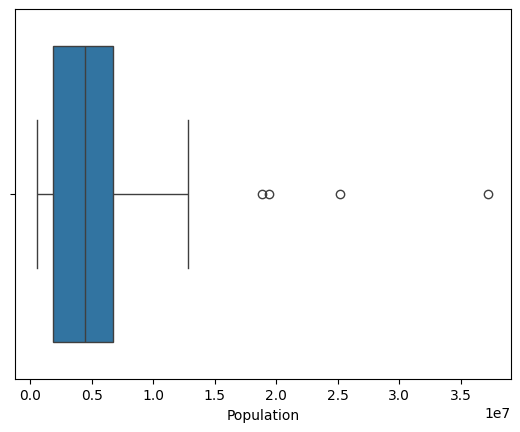

In [58]:
# 상자그림
sns.boxplot(data=df, x='Population')

위 상자그림을 보면 데이터의 분포와 극단값이 데이터 내에 포함되어 있음을 확인할 수 있음

In [60]:
# 도수분포표
binnedPopulation = pd.cut(df['Population'], 10) # 동일한 크기로 10개의 구간을 나눈다.
binnedPopulation.value_counts() # 위에서 나눈 값을 통해 빈도수를 구해 도수분포표 완성

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

<Axes: xlabel='Population', ylabel='Count'>

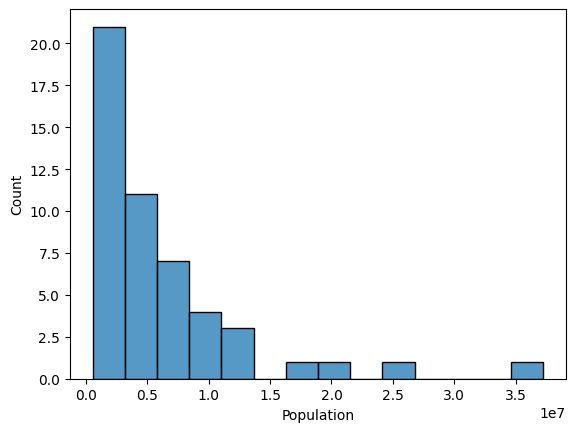

In [61]:
# 히스토그램
sns.histplot(data = df, x = 'Population')

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_1116/1945170011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Murder.Rate'], kde = True, rug = True)


<Axes: xlabel='Murder.Rate', ylabel='Density'>

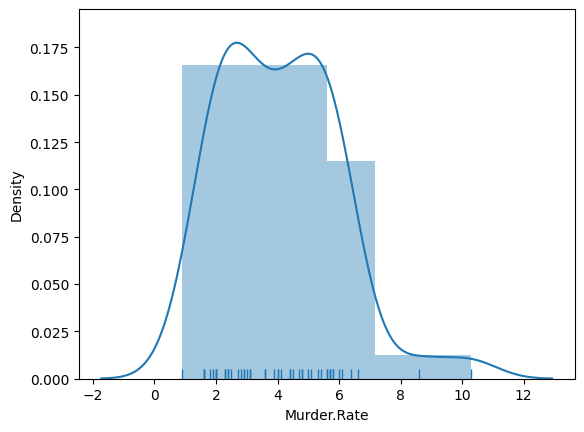

In [66]:
# 커널 밀도 추정을 위한 밀도 그림
sns.distplot(df['Murder.Rate'], kde = True, rug = True)

# 4. 이진 데이터와 범주 데이터 탐색하기

<Axes: xlabel='State', ylabel='Population'>

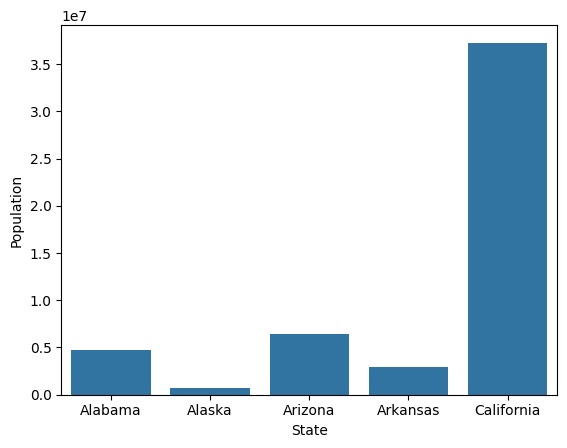

In [69]:
# 
sns.barplot(data = df.head(), x = 'State', y = 'Population')